In [7]:
import scipy
from scipy import io
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

### Exercise 3

In [8]:
file = scipy.io.loadmat('capacities.mat')
capacities = file.get('capacities')
capacities = capacities.reshape(28,)

file = scipy.io.loadmat('traveltime.mat')
traveltime = file.get('traveltime')
traveltime = traveltime.reshape(28,)

file = scipy.io.loadmat('flow.mat')
flow = file.get('flow')
flow = flow.reshape(28,)

# B, the node-link incidence matrix
# each row corresponds to a node, we have 17 nodes
# each column corresponds to a link, we have 28 edges
file = scipy.io.loadmat('traffic.mat')
traffic = file.get('traffic') 

In [9]:
print("capacities shape: ", np.shape(capacities))
print("traveltime shape: ", np.shape(traveltime))
print("flow shape: ", np.shape(flow))
print("traffic shape: ", np.shape(traffic))

capacities shape:  (28,)
traveltime shape:  (28,)
flow shape:  (28,)
traffic shape:  (17, 28)


[[ 1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 -1  0  0  0  0]
 [ 0  1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  1  0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0  1  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0

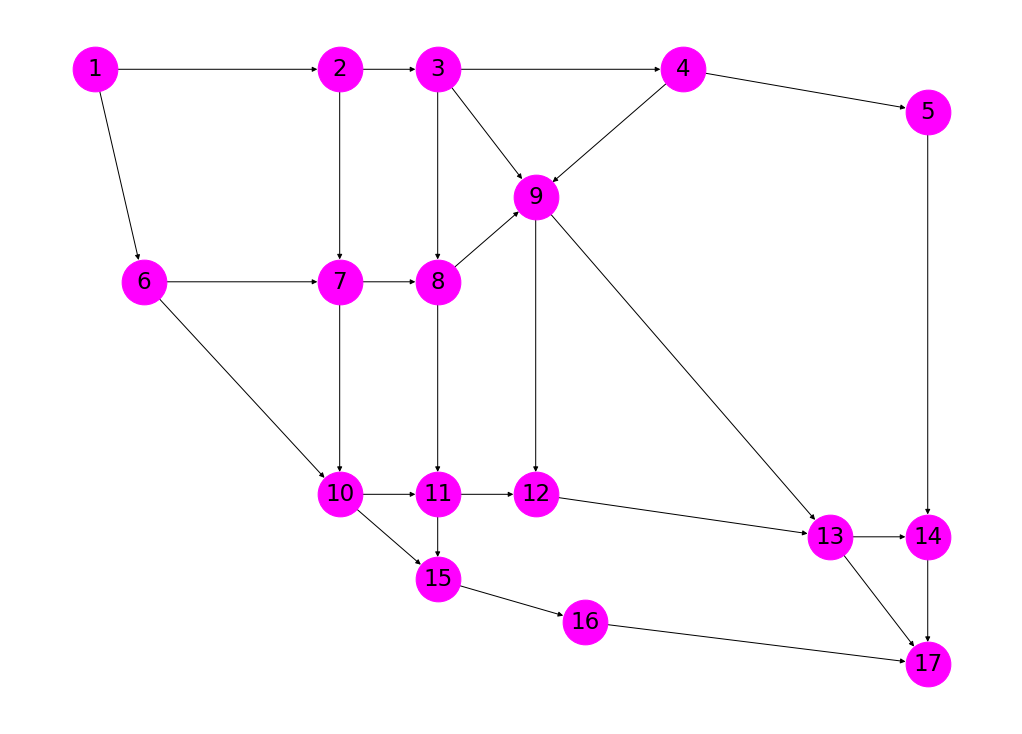

In [24]:
fig = plt.figure(1, figsize=(14,10))

#print(traffic.T)
#print(np.shape(traffic.T))

edges = np.shape(traffic.T)[0]
nodes = np.shape(traffic.T)[1]

#print(nodes)
print(edges)

G = nx.DiGraph()

for i in range(0, edges):
    for j in range(0, nodes):
        #print(traffic.T[i][j], j+1)
        if(traffic.T[i][j]==1):
            tail = j+1
            
        if(traffic.T[i][j]==-1):
            head = j+1
            G.add_edges_from([(tail, head)], capacity = capacities[i])
            
pos = {1:[0,15], 2:[5,15], 3:[7,15], 4:[12,15], 5:[17,14],
       6:[1,10], 7:[5,10], 8:[7,10], 9:[9,12], 10:[5,5],
       11:[7,5], 12:[9,5], 13:[15,4], 14:[17,4],15:[7,3],
       16:[10,2], 17:[17,1]
      }       
            
nx.draw(G, pos, with_labels = True, font_color='black', node_color='magenta',  node_size=2000, font_size=23)
print(dict(G.edges))
print(capacities)  

**(a) Find the shortest path between node 1 and 17. This is equivalent to the fastest path (path with shortest traveling time) in an empty network.**

The shortest path is the path with the shortest traveling time in an empty network (so with flow 0) between the source and the destination given. 
So we have the node-link incidence matrix (17, 28) and the traveltime per link (28)

We first need to define the **delay function $d_e(f_e)$ on a given edge e**, which is:

$$d_e(f_e) = \frac{l_e}{1-f_e/C_e} $$

the **lenght $l_e$ of the edge e** divided by 1 - the fraction of the **flow $f_e$ on that edge** and the **capacity $C_e$ on that edge**.

We compute the **cost function** $\psi_e(f_e)$ (also known as **objective function**), which is defined as:

\begin{equation}
	\sum_{e \in E} \psi_e(f_e) = f_e d_e(f_e)
\end{equation}

the total sum on every edge of the **flow on that edge $f_e$** times the **delay on that edge $d_e(f_e)$**.

In [11]:
test = np.array([[34, 67],[78,12]])
print(test)

[[34 67]
 [78 12]]


In [12]:
for i, e in enumerate(test.T):
    print(i, e)

0 [34 78]
1 [67 12]
